<a id="section_toc"></a> 
## Tabla de Contenidos

[Consigna](#section_consigna)

[Dataset_full](#section_full_dataset)

Filtro

$\hspace{.5cm}$[Columnas_1](#section_col1)

[Dataset_CABA](#section_CABA)

[Dataset_BPC](#section_BPC)

[Dataset_Palermo](#section_palermo)

Filtro

$\hspace{.5cm}$[Agrupacion Columnas_2](#section_col2)

[Analisis descriptivo pre limpieza](#section_EDA)

[Detección de valores faltantes](#section_deteccion_faltantes)

Estrategias  

$\hspace{.5cm}$[Drop](#section_drop)

$\hspace{.5cm}$[Imputación](#section_imputacion)

[Duplicados](#section_duplicados)

[Nuevas_columnas](#section_nuevas)

[Agregacion de data externa](#section_externa)



<a id="section_consigna"></a> 
## Consigna

[volver a TOC](#section_toc)

**Properati. Workshop 1**

y = precio por metro cuadrado de una propiedad en USD

El dataset de Properati es de tamaño entre pequeño y mediano, pero tiene dos complejidades a las que
deberá prestarle atención:
* Peso de missing data en algunas variables relevantes.
* Será importante tener en cuenta el problema de la influencia espacial en los precios
por metro cuadrado. En efecto, es probable que existan diferencias importantes de
en las diferentes geografías, barrios y zonas analizadas.


Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar
estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

In [220]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import requests
sns.set() #par que es?

<a id="section_full_dataset"></a> 
## Dataset full

[volver a TOC](#section_toc)

In [147]:
df = pd.read_csv("properati.csv", index_col=0)

In [148]:
df.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


El dataset contiene información sobre todas las propiedades georeferenciadas de la base
de datos de la empresa. La información de cada propiedad que incluye es la siguiente:
* Fecha de creación
* Tipo de la propiedad (house, apartment, ph)
* Operación del aviso (sell, rent)
* Nombre del lugar
* Nombre del lugar + nombre de sus ‘padres’
* ID de geonames del lugar (si está disponible)
* Latitud,Longitud
* Precio original del aviso
* Moneda original del aviso (ARS, USD)
* Precio del aviso en moneda local (ARS)
* Precio aproximado en USD
* Superficie en m2
* Superficie cubierta en m2
* Precio en USD/m2
* Precio por m2
* N° de piso, si corresponde
* Ambientes
* URL en Properati
* Descripción
* Título
* URL de un thumbnail de la primer foto

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

In [150]:
df.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [151]:
df.place_name.value_counts().head(10)

Córdoba          9254
Rosario          8504
Mar del Plata    6534
Tigre            3324
Nordelta         3315
Belgrano         2992
Palermo          2885
La Plata         2534
Caballito        2273
Pilar            2228
Name: place_name, dtype: int64

In [152]:
df.state_name.value_counts()

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [153]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(121220, 25)
Index(['operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail'],
      dtype='object')
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surfa

In [165]:
por_nulos = df.isnull().sum() / data.shape[0]
por_nulos_sorted = por_nulos.sort_values(ascending=False)
por_nulos_sorted

floor                         0.934837
expenses                      0.882346
rooms                         0.609058
price_usd_per_m2              0.433947
lon                           0.425260
lat                           0.425260
surface_total_in_m2           0.324435
price_per_m2                  0.276869
currency                      0.168380
price_aprox_usd               0.168372
price_aprox_local_currency    0.168372
price                         0.168372
surface_covered_in_m2         0.164222
place_name                    0.000190
description                   0.000016
title                         0.000000
state_name                    0.000000
property_type                 0.000000
dtype: float64



<a id="section_col1"></a> 
## Columnas 1

[volver a TOC](#section_toc)

Conclusion de primer filtro de columnas no utiles:

* 'operation. todo el dataset tiene valor 'sell'
* 'place_with_parent_names' esta pais|estad|barrio todo junto. Ya tenemos esta informacion en place_name en barrio
* 'country_name' esta Argentina solo
* 'image_thumbnail' no util para predecir
* 'lat-lon' repetido, ya esta lat y long.

* geomnae_id no util
* properati_url no util


In [155]:
#Primer filtro
desired_col= ['property_type', 'place_name', 'state_name', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title']
#, 'geonames_id' and , 'properati_url'
#df_caba= caba[desired_col]
df= df[desired_col]

In [156]:
#posibles variables no utiles
df.floor.value_counts() # floor, pisos, la vamos a filtrar y sacar outliers

1.0      2080
2.0      1542
3.0       914
4.0       658
5.0       484
         ... 
124.0       1
691.0       1
205.0       1
302.0       1
30.0        1
Name: floor, Length: 182, dtype: int64


<a id="section_CABA"></a> 
## CABA

[volver a TOC](#section_toc)

In [157]:
caba = df.loc[data.state_name == 'Capital Federal', :]
caba.head(3)
type(caba)
caba.state_name.value_counts()

Capital Federal    32316
Name: state_name, dtype: int64

In [158]:
caba.pivot_table(index=['place_name', 'rooms'], 
                                aggfunc={'rooms': 'count', 
                                         'price': ['mean', 'median', 'std'],
                                         'surface_covered_in_m2': ['mean', 'median', 'std']
                                         }
                                ).round(2)

price                      rooms  \
                             mean    median        std count   
place_name       rooms                                         
Abasto           1.0     66583.33   62000.0   16597.96    12   
                 2.0     93241.67   79450.0   32499.50    12   
                 3.0    144352.94  139500.0   41936.99    17   
                 4.0    154375.00  160000.0   13146.84    17   
                 5.0    234633.33  244000.0   26235.54     3   
...                           ...       ...        ...   ...   
Villa del Parque 4.0    251179.07  223000.0  100646.70    44   
                 5.0    492500.00  520000.0  161941.35     4   
                 6.0    413333.33  370000.0   92915.73     4   
                 7.0    320000.00  320000.0       0.00     3   
                 8.0    435000.00  435000.0   91923.88     2   

                       surface_covered_in_m2                 
                                        mean median     std  
place_name       rooms                                       
Abasto           1.0                   33.27   30.0    7.82  
                 2.0                   41.25   42.5    8.21  
                 3.0                   71.25   67.5   19.36  
                 4.0                   35.00    5.0   33.50  
                 5.0                  119.67  104.0   36.14  
...                                      ...    ...     ...  
Villa del Parque 4.0                  100.56   93.0   45.34  
                 5.0                  159.75  192.5   98.83  
                 6.0                  163.50  112.0  185.82  
                 7.0                  377.33  481.0  179.56  
                 8.0                   20.00   20.0    0.00  

[468 rows x 7 columns]


<a id="section_BPC"></a> 
## Belgrano, Palermo y Caballito

[volver a TOC](#section_toc)


Tomamos como muestra los barrios de Belgrano, Palermo y Caballito. 
Dentro de CABA, son los barrios con mayor datos disponibles.
Asimismo, no poseeen niveles socioeconomicos extremadamente disimiles. 

In [204]:
# 3 barrios
df_barrios = caba[(caba['place_name'] == 'Belgrano') | (caba['place_name'] == 'Palermo') | (caba['place_name'] == 'Caballito')]
df_barrios.head(5)

,property_type,place_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
7,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,138000.0,USD,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...
8,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,195000.0,USD,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,..."
19,apartment,Palermo,Capital Federal,-34.580504,-58.405874,350000.0,USD,6175575.00,350000.0,104.0,96.0,3365.384615,3645.833333,NaN,3.0,NaN,Excelente semipiso al contra frente en Bulnes ...,"Bulnes y Libertador: espectacular pulmón, con ..."
21,apartment,Palermo,Capital Federal,-34.590926,-58.411665,270500.0,USD,4772837.25,270500.0,118.0,73.0,2292.372881,3705.479452,NaN,4.0,NaN,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...",Departamento de 4 ambientes en Venta en Palermo
52,apartment,Caballito,Capital Federal,-34.622211,-58.439128,110000.0,USD,1940895.00,110000.0,50.0,50.0,2200.000000,2200.000000,NaN,3.0,NaN,Departamento de 3 Ambientes al Contrafrente. S...,CABALLITO 3 AMB. EN VENTA Listo para escriturar


In [205]:
df_barrios.place_name.value_counts()

Belgrano     2992
Palermo      2885
Caballito    2273
Name: place_name, dtype: int64

In [206]:
df_barrios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8150 entries, 7 to 121215
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               8150 non-null   object 
 1   place_name                  8150 non-null   object 
 2   state_name                  8150 non-null   object 
 3   lat                         5886 non-null   float64
 4   lon                         5886 non-null   float64
 5   price                       7108 non-null   float64
 6   currency                    7108 non-null   object 
 7   price_aprox_local_currency  7108 non-null   float64
 8   price_aprox_usd             7108 non-null   float64
 9   surface_total_in_m2         6774 non-null   float64
 10  surface_covered_in_m2       7720 non-null   float64
 11  price_usd_per_m2            5788 non-null   float64
 12  price_per_m2                6763 non-null   float64
 13  floor                       842

In [207]:
#vemos los nulos en % y descendiente
por_nul_b = df_barrios.isnull().sum()/df_barrios.shape[0]*100
por_nul_sorted_b = por_nul_b.sort_values(ascending=False)
por_nul_sorted_b

floor                         89.668712
expenses                      74.466258
rooms                         56.785276
price_usd_per_m2              28.981595
lon                           27.779141
lat                           27.779141
price_per_m2                  17.018405
surface_total_in_m2           16.883436
price_aprox_usd               12.785276
price_aprox_local_currency    12.785276
currency                      12.785276
price                         12.785276
surface_covered_in_m2          5.276074
state_name                     0.000000
place_name                     0.000000
title                          0.000000
description                    0.000000
property_type                  0.000000
dtype: float64

In [208]:
missing_df = df_barrios.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,2264,0.277791
4,lon,2264,0.277791
5,price,1042,0.127853
6,currency,1042,0.127853
7,price_aprox_local_currency,1042,0.127853
8,price_aprox_usd,1042,0.127853
9,surface_total_in_m2,1376,0.168834


Agrupacion columnas por tipo

<a id="section_col2"></a> 
## Agrupacion columnas 2

[volver a TOC](#section_toc)

In [209]:

#Segundo filtro columnas_agrupacion

#Columnas de precio, posible dependientes
price = ["price", "currency", "price_aprox_local_currency", "price_aprox_usd", "price_usd_per_m2", "price_per_m2"]
price.remove("currency")
#price= df_barrios[price_col]

#quant
quantitative = [f for f in df_barrios.columns if df_barrios.dtypes[f] != 'object']
#quantitative.remove('geonames_id')
quantitative.remove("price")
quantitative.remove("price_aprox_local_currency")
quantitative.remove("price_aprox_usd")
quantitative.remove("price_usd_per_m2")
quantitative.remove("price_per_m2")

#qual
qualitative = [f for f in df_barrios.columns if df_barrios.dtypes[f] == 'object']
qualitative.remove("currency")
#qualitative.remove("properati_url")

In [210]:
print(quantitative)
print(qualitative)
print(price)

['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses']
['property_type', 'place_name', 'state_name', 'description', 'title']
['price', 'price_aprox_local_currency', 'price_aprox_usd', 'price_usd_per_m2', 'price_per_m2']


<a id="section_palermo"></a> 
## Palermo

[volver a TOC](#section_toc)

In [211]:
palermo = df_barrios.loc[data.place_name == 'Palermo', : ]

por_nul_p = palermo.isnull().sum()/palermo.shape[0]*100
por_nul_sorted_p = por_nul_p.sort_values(ascending=False)

lat_max = palermo.lat.max()
lat_min = palermo.lat.min()
lon_max = palermo.lon.max()
lon_min = palermo.lon.min()

palermo.shape
#por_nul_sorted

(2885, 18)

In [212]:
por_nul4 = palermo.isnull().sum()/palermo.shape[0]*100
por_nul_sorted4 = por_nul4.sort_values(ascending=False)
por_nul_sorted4

floor                         89.046794
expenses                      71.646447
rooms                         57.019064
price_usd_per_m2              31.265165
lon                           27.694974
lat                           27.694974
surface_total_in_m2           19.168111
price_per_m2                  18.301560
price_aprox_usd               12.720971
price_aprox_local_currency    12.720971
currency                      12.720971
price                         12.720971
surface_covered_in_m2          6.967071
state_name                     0.000000
place_name                     0.000000
title                          0.000000
description                    0.000000
property_type                  0.000000
dtype: float64

<a id="section_EDA"></a> 
## Analisis descriptivo pre limpieza

[volver a TOC](#section_toc)

<AxesSubplot:>

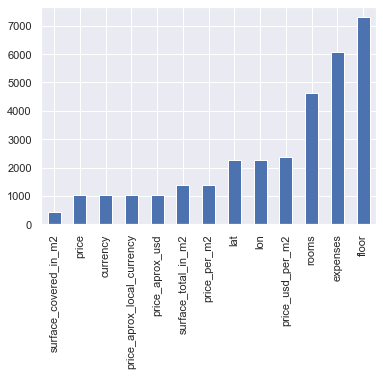

In [213]:
missing = df_barrios.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:title={'center':'Normal'}, xlabel='price_per_m2'>

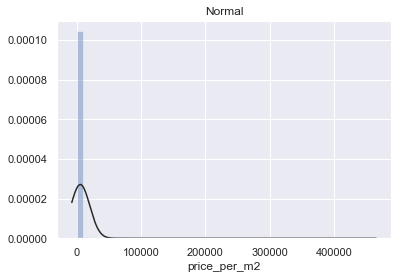

In [214]:
import scipy.stats as st #falta trabajar la dependiente!
y = df_barrios['price_per_m2']
#plt.figure(1); plt.title('Johnson SU')
#sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
#plt.figure(3); plt.title('Log Normal')
#sns.distplot(y, kde=False, fit=st.lognorm)

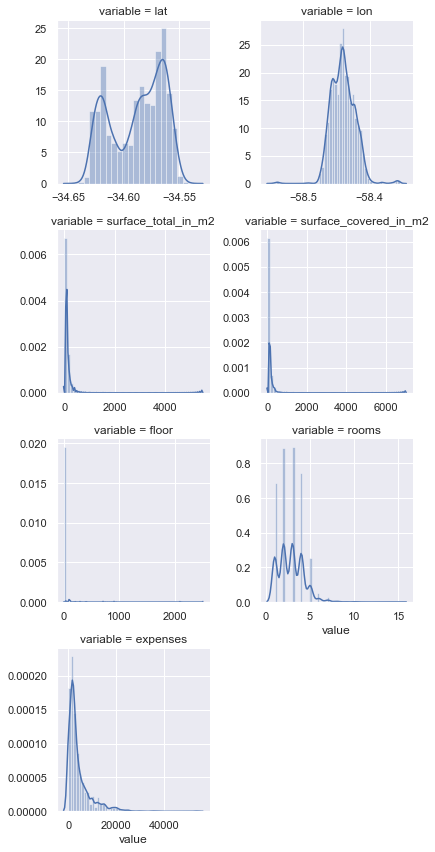

In [215]:
f = pd.melt(df_barrios, value_vars=quantitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

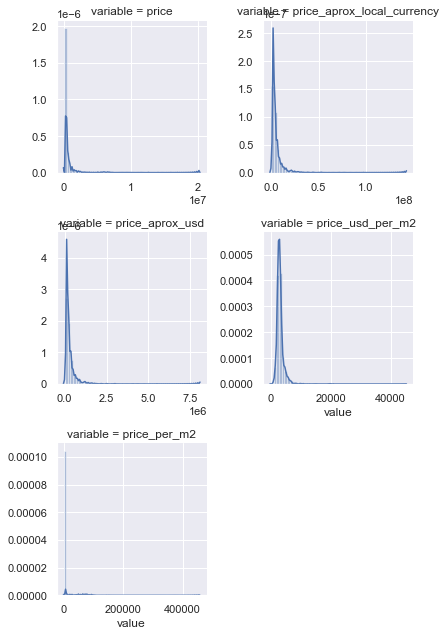

In [199]:
f = pd.melt(df_barrios, value_vars=price)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [217]:
# for c in qualitative:
#     df_barrios[c] = df_barrios[c].astype('category')
#     if df_barrios[c].isnull().any():
#         df_barrios[c] = df_barrios[c].cat.add_categories(['MISSING'])
#         df_barrios[c] = df_barrios[c].fillna('MISSING')

# def boxplot(x, y, **kwargs):
#     sns.boxplot(x=x, y=y)
#     x=plt.xticks(rotation=90)
# f = pd.melt(df_barrios, id_vars=['price_per_m2'], value_vars=qualitative)
# g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
# g = g.map(boxplot, "value", "price_per_m2")

<Figure size 864x864 with 0 Axes>

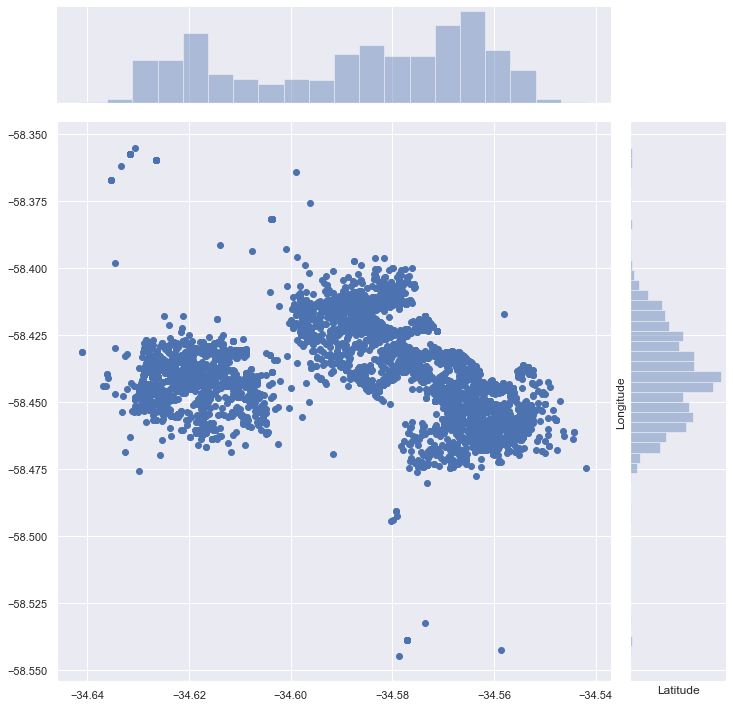

In [218]:
plt.figure(figsize=(12,12))
sns.jointplot(x=df_barrios.lat.values, y=df_barrios.lon.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

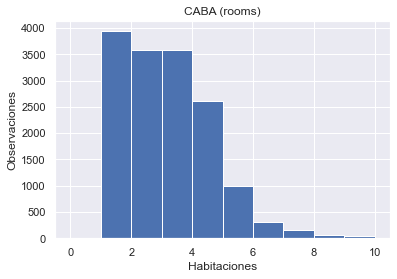

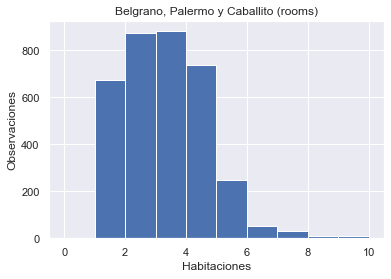

In [219]:
#room - -esto seria la justificacion para agrupar los valores mas alla de 5 habitaciones en una sola categoria

%matplotlib inline
room = caba['rooms']
plt.hist(room, bins=(0,1,2,3,4,5,6,7,8,9,10))
plt.xlabel('Habitaciones')
plt.ylabel('Observaciones')
plt.title(r'CABA (rooms)')
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True)
plt.show()

room2 = df_barrios['rooms']
plt.hist(room2, bins=(0,1,2,3,4,5,6,7,8,9,10))
plt.xlabel('Habitaciones')
plt.ylabel('Observaciones')
plt.title(r'Belgrano, Palermo y Caballito (rooms)')
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True)
plt.show()

<a id="section_deteccion_faltantes"></a> 
## Detección de valores faltantes

[volver a TOC](#section_toc)

In [26]:
#vemos los nulos en % y descendiente
por_nul = df_barrios.isnull().sum()/df_barrios.shape[0]*100
por_nul_sorted = por_nul.sort_values(ascending=False)
por_nul_sorted

floor                         89.668712
expenses                      74.466258
rooms                         56.785276
price_usd_per_m2              28.981595
lon                           27.779141
lat                           27.779141
price_per_m2                  17.018405
surface_total_in_m2           16.883436
price_aprox_usd               12.785276
price_aprox_local_currency    12.785276
currency                      12.785276
price                         12.785276
surface_covered_in_m2          5.276074
geonames_id                    0.000000
place_name                     0.000000
state_name                     0.000000
title                          0.000000
description                    0.000000
properati_url                  0.000000
property_type                  0.000000
dtype: float64

<AxesSubplot:>

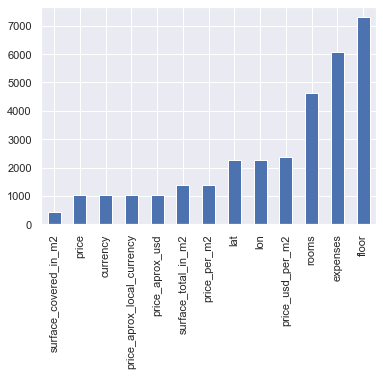

In [221]:
missing = df_barrios.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [222]:
missing_df = df_barrios.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df_barrios.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,state_name,0,0.000000
3,lat,2264,0.277791
4,lon,2264,0.277791
5,price,1042,0.127853
6,currency,1042,0.127853
7,price_aprox_local_currency,1042,0.127853
8,price_aprox_usd,1042,0.127853
9,surface_total_in_m2,1376,0.168834


Creamos un nuevo dataframe (df): 

*   sin tener en cuenta los datos (de precio) expresados unicamente en ARS. El 84% de todos los datos están expresados en USD.
*   Seleccionamos los datos sean solo departamentos (apartments) para nuestro analisis, dado que comprende un 91% de las propiedades.

In [27]:
df_barrios_usd = df_barrios[df_barrios['currency'] != 'ARS'] 
#Creamos un nuevo df sin tener en cuenta los datos con ARS, el 84% estan expresados en USD.

df_barrios_usd_apto = df_barrios[df_barrios['property_type'] == 'apartment']
#Seleccionamos los datos sean solo departamentos para nuestro analisis, dado que comprende un 91% de las propiedades.


In [28]:
#vemos los nulos en % y descendiente
por_nulos2 = df_barrios_usd_apto.isnull().sum()/df_barrios.shape[0]*100
por_nulos_sorted2 = por_nulos2.sort_values(ascending=False)
por_nulos_sorted2

floor                         81.325153
expenses                      66.429448
rooms                         51.239264
lon                           26.736196
lat                           26.736196
price_usd_per_m2              25.975460
price_per_m2                  15.460123
surface_total_in_m2           14.711656
price_aprox_usd               11.742331
price_aprox_local_currency    11.742331
currency                      11.742331
price                         11.742331
surface_covered_in_m2          4.588957
geonames_id                    0.000000
place_name                     0.000000
state_name                     0.000000
title                          0.000000
description                    0.000000
properati_url                  0.000000
property_type                  0.000000
dtype: float64

<a id="section_duplicados"></a> 
## Duplicados

[volver a TOC](#section_toc)

<a id="section_nuevas"></a> 
## Nuevas columnas

[volver a TOC](#section_toc)

In [107]:
df_barrios.description.dtype

CategoricalDtype(categories=[' \tExcelente Piso de 6 ambientes con dependencia.3 cocheras fijas (2 cubiertas y 1 descubierta)228m2 tot mas cocheras y bauleraEdificio 10 pisos.Expensas $ 20.000 Seguridad 24hsCalefaccion y Agua caliente individual por caldera propiaBaños y cocina reciclados hace 8 años aprox.Pisos en todo el depto madera tarugada y ceramicos en cocina y bañosPalier privadoLiving comedor en L 7x5 + 4x5 a Balcon al frenteToillete de recepcionEstar/Escritorio 4x44 dormitorios: 4x5 - 3,50x4 - suite 5x4,50 c/vestidor - 5x3,502 baños completos (1ste)Cocina 4x8Lavadero separadoDependencia de servicio con su baño',
                  '                                                                   IDEAL INVERSOR- APTO CRÉDITO.Departamento de 3 ambientes que este momento cuenta con una subdivisión ,living-comedor amplio con salida al balcon corrido,cocina independiente luminosa y lavadero .pasillo distribuidor que lleva a las dos habitaciones ambas  con su placard empotrado y v

In [106]:
df_barrios.title.dtype

CategoricalDtype(categories=['  Departamento 2 ambientes Venta Belgrano duplex',
                  '  VALENTIN VIRASORO 1600, Caballito 2 Amb a Estrenar  ',
                  ' 1 AMB CON BALCON TERRAZA BELGRANO',
                  ' 2 Ambientes con Cocina Integrada en Belgrano R',
                  ' 3 Ambientes, Barrio Norte , Frente , Balcón terraza , Excelente luminosidad',
                  ' A ZONA PARQUE RIVADAVIA',
                  ' Amplio 3 amb c/ baño, toilette y balcón - A mts Av Libertador',
                  ' Av del Libertador 3500 - Palermo - Capital Federal',
                  ' Av. Santafe 4900 PALERMO (SIN COCHERA  USD 220000 ) HERMOSO DEPTO 4 AMBIENTES.',
                  ' Bulnes 1900 - Palermo',
                  ...
                  '¡AMBIENTE UNICO CON COCHERA EN TERRAZAS AL POLO!',
                  '¡INCREIBLE! 2 amb A ESTRENAR en Belgrano c/ Gran Terraza',
                  '¡OPORTUNIDAD! Exc 1amb c/ Bcón - Amenities - Apto Prof. - A ESTRENAR!!!',
         

In [126]:
description = df_barrios.description

#description.index('pileta')

<a id="section_externa"></a> 
## Data set externos

[volver a TOC](#section_toc)

**Data sets externos**

* Agreguen toda otra información construida a partir de los datos originales (o incluso información externa) que consideren relevante y útil para resolver los objetivos planteados.

In [118]:
subte_data = "https://raw.githubusercontent.com/carlachka/grupo2dh/master/ws1/data/subte.csv"
ferro_data = "https://raw.githubusercontent.com/carlachka/grupo2dh/master//ws1/data/ferrocarril.csv"
paradas_df = "https://raw.githubusercontent.com/carlachka/grupo2dh/master//ws1/data/paradas.csv"

subte = pd.read_csv(subte_data) 
ferro = pd.read_csv(ferro_data)
colec = pd.read_csv(paradas_df)

#palermo = "https://raw.githubusercontent.com/carlachka/grupo2dh/master/paler.csv"
#palerm = pd.read_csv(palermo)

In [119]:
subte.head(3) # long lat id estacion linea

,long,lat,id,estacion,linea
0,-58.398928,-34.635750,1.0,CASEROS,H
1,-58.400970,-34.629376,2.0,INCLAN - MEZQUITA AL AHMAD,H
2,-58.402323,-34.623092,3.0,HUMBERTO 1°,H


In [120]:
subte.estacion.value_counts().sort_values(ascending=False)

RETIRO                        2
INDEPENDENCIA                 2
PUEYRREDON                    2
SAENZ PEÑA                    1
ONCE - 30 DE DICIEMBRE        1
                             ..
ACOYTE                        1
INCLAN - MEZQUITA AL AHMAD    1
ENTRE RIOS - RODOLFO WALSH    1
AV. DE MAYO                   1
SAN JOSÉ DE FLORES            1
Name: estacion, Length: 87, dtype: int64

In [121]:
colec.head(3)

,stop_id,stop_code,stop_name,stop_lat,stop_lon,direction_id,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type
0,201,201,1520 DEFENSA,-34.625663,-58.371042,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
1,2072,2072,722 REGIMIENTO DE PATRICIOS AV.,-34.636743,-58.369765,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3
2,2079,2079,324 REGIMIENTO DE PATRICIOS AV.,-34.632942,-58.370332,1,108,26,22A,JNAMBA022,Retiro - Cno. Centenario y Lavalleja,3


In [122]:
#Cambio los nombres de las columnas de paradas de colectivos
colec = colec.rename({
    'stop_lat': 'lat',
    'stop_lon': 'long',
}, axis=1)

Todas las lat y long en los 4 dataframes son float.

**Distancia entre dos puntos de latitud y longitud - Haversine_formula**

The [haversine](https://en.wikipedia.org/wiki/Haversine_formula) formula allows the haversine of Θ (that is, hav(Θ)) to be computed directly from the latitude and longitude of the two points.

<img src="h_formula.png" alt="Drawing" style="width: 400px;"/>


* φ1, φ2 are the latitude of point 1 and latitude of point 2 (in radians),
* λ1, λ2 are the longitude of point 1 and longitude of point 2 (in radians).

As similar formula can be written using cosines (sometimes called the spherical law of cosines, not to be confused with the law of cosines for plane geometry) instead of haversines, but if the two points are close together (e.g. a kilometer apart, on the Earth) you might end up with an inaccurate answer. Since the haversine formula uses sines, it avoids that problem.

A [simplified formula](http://www.movable-type.co.uk/scripts/latlong.html) says:

<img src="h_simple.png" alt="Drawing" style="width: 600px;"/>


In [123]:
#vectorized numpy version of the same function

import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    
    km = 6367 * c  #el radio de la tierra no es 6371 km??
    
    return km



In [124]:
lon1, lon2, lat1, lat2 = np.random.randn(4, 1000000)
df = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})
km = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])
df['distance'] = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])

In [155]:
lat_max = paler.lat.max()
lat_min = paler.lat.min()
lon_max = paler.lon.max()
lon_min = paler.lon.min()

In [205]:
subte.head(3) # long lat id estacion linea AGREGAR subte
colec.head(3) # lat long stop_id route_id  AGREGAR colectivo
ferro.head(3) # lat long id nombre barrio  AGREGAR ferrocarril
print(subte.shape)
print(colec.shape)
print(ferro.shape)

(90, 5)
(42463, 12)
(230, 11)


In [176]:
print(subte.shape)
print(colec.shape)
print(ferro.shape)

(90, 5)
(42463, 12)
(230, 11)


In [125]:
dist = pd.DataFrame() 

dist['distance'] = haversine_np(palermo['lon'],palermo['lat'],subte['long'],subte['lat'])
dist.head(25)

,distance
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [127]:
#for loop paara dummy:cercania a estacion de subte

<a id="section_foursquare"></a> 
## Fousquare (Dani)

[volver a TOC](#section_toc)

In [ ]:
#stack over formula
#https://en.wikipedia.org/wiki/Haversine_formula

from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) #2*R*asin...

In [128]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'R4IHAX3SZWGI4FBGVPG0GWN3COMXJXBBYZSBEL04NA130FIO' # your Foursquare ID
CLIENT_SECRET = '5M21HY12HU5J4UH0AKW3NPEVY1KQLNL5LD4ZP4MQZ3LFBYF4' # your Foursquare Secret
VERSION = '20200929' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: R4IHAX3SZWGI4FBGVPG0GWN3COMXJXBBYZSBEL04NA130FIO
CLIENT_SECRET:5M21HY12HU5J4UH0AKW3NPEVY1KQLNL5LD4ZP4MQZ3LFBYF4


In [129]:
LIMIT = 1000
radius = 500
query = 'Metro Station'

In [130]:
def metro_stations_near(lat, lon):

    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lon, 
        radius, 
        LIMIT,
        query)
    
    results = requests.get(url).json()
    venues = results['response']['totalResults']
    
    return venues

In [131]:
data['train_sub_stations_near'] = df_barrios.apply(lambda x: metro_stations_near(x.lat, x.lon), axis=1)

KeyError: 'totalResults'